In [1]:
import pandas as pd
import sys
sys.path.append("../../..")

import matplotlib.pyplot as plt
import mplhep as hep

%load_ext autoreload
%autoreload 1
%aimport longitudinalProfile.camel.emilia_samples.emilia_peak_finder
from longitudinalProfile.camel.emilia_samples.emilia_peak_finder import *

from longitudinalProfile.camel.peak_finding import *

In [2]:
reader = EmiliaSampleReader()

In [4]:
driver = EmiliaCamelFinderDriver(reader)
driver.findPeaks(sampleRange=range(0, 1))

  0%|          | 0/1 [00:00<?, ?it/s]

Peak finding efficiency : 44.1%


In [5]:
driver.addInfoToPeaks()
driver.applyFilters()
driver.extractMostProminentPeak()
driver.makeHistogram()

FilterLowBaseHeight - efficiency 32.2%
FilterNoisyCellsPeaksUsingBases - efficiency 72.3%
FilterDipsNotInCenter - efficiency 100.0%


(Hist(
   IntCategory([20, 30, 50, 80, 100, 120, 150, 200, 250, 300], name='beamEnergy', label='Beam energy (GeV)'),
   Regular(20, 0, 10, name='dipWidthQuantile', label='Width of dip, at 70% quantile height (in layers)'),
   Regular(30, 0, 0.07, name='dipProminence', label='Dip prominence (GeV)'),
   storage=Double()) # Sum: 8.0 (1027.0 with flow),
 Hist(
   IntCategory([20, 30, 50, 80, 100, 120, 150, 200, 250, 300], name='beamEnergy', label='Beam energy (GeV)'),
   Regular(20, 0, 10, name='dipWidthQuantile', label='Width of dip, at 70% quantile height (in layers)'),
   Regular(30, 0, 1.2, name='dipProminenceNormalized', label='Dip prominence, as fraction of mean maximum layer energy'),
   storage=Double()) # Sum: 1026.0 (1027.0 with flow))

/grid_mnt/vol_home/llr/cms/cuisset/mambaforge/envs/clustering-analysis-gpu2/lib/python3.10/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


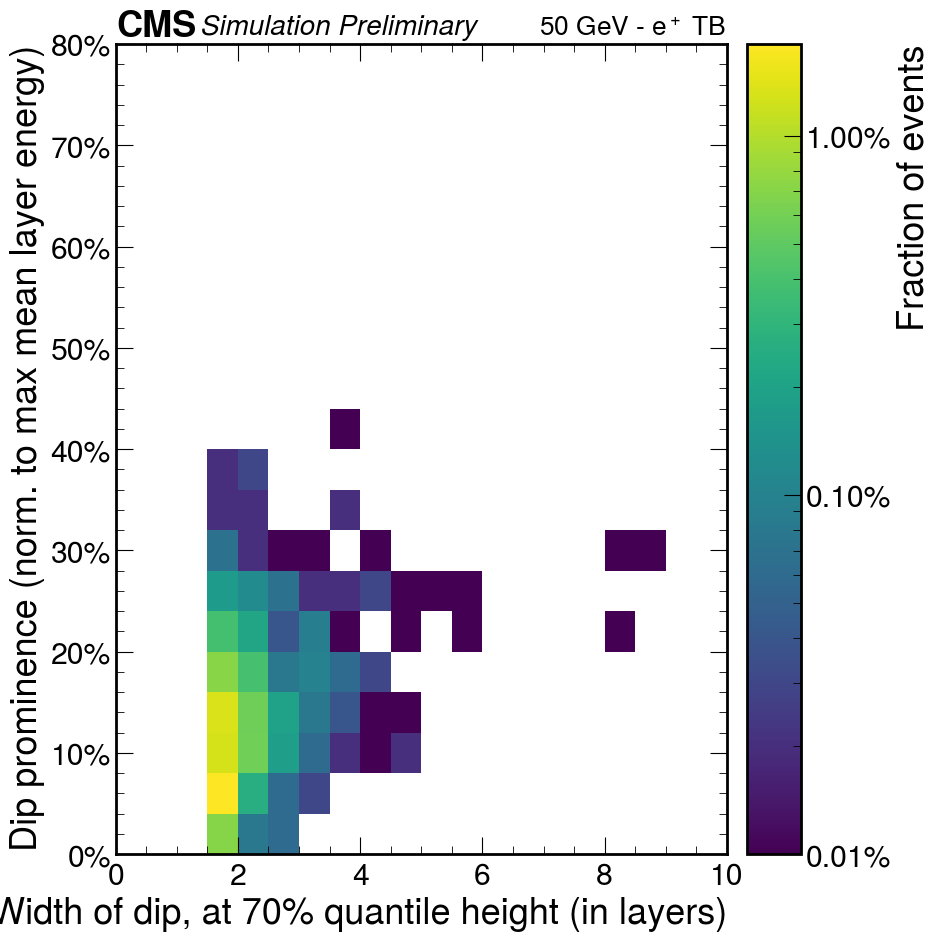

In [6]:
plt.style.use(hep.style.CMS)
driver.plotHistogram(50, normalizeEventCount=True)
plt.tight_layout()

In [ ]:
driver.peaks_df_mostProminent.query("prominences > 2 and widths > 3")

,rechits_energy_maxLayer,peak_index,prominences,left_bases,right_bases,widths,width_heights,left_ips,right_ips
eventInternal,,,,,,,,,
506,5.510787,6.0,2.056297,5.0,12.0,3.668699,-3.865753,5.300000,8.968699
6253,3.869078,12.0,2.038104,7.0,15.0,5.581626,-2.622990,8.668572,14.250198
6295,4.465044,10.0,2.174952,7.0,16.0,3.314466,-3.004658,8.370404,11.684870
7533,4.690673,7.0,2.540656,6.0,14.0,3.987167,-3.449971,6.300000,10.287167


In [ ]:
eventList = driver.getPassingEventList().query("prominences > 2 and widths > 3")
len(eventList)

4

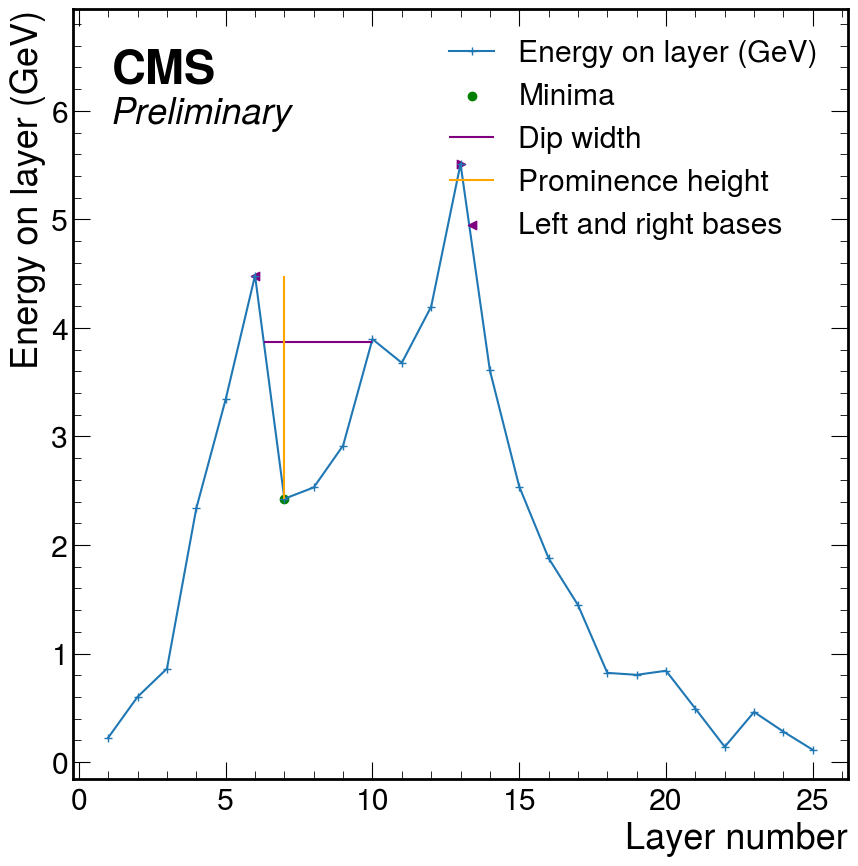

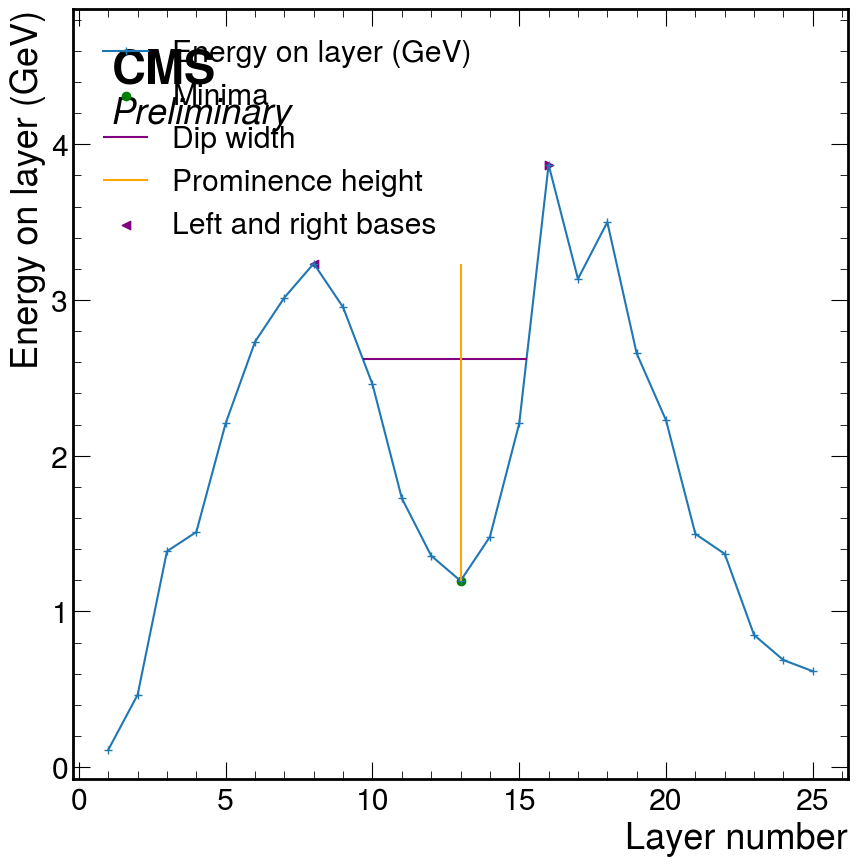

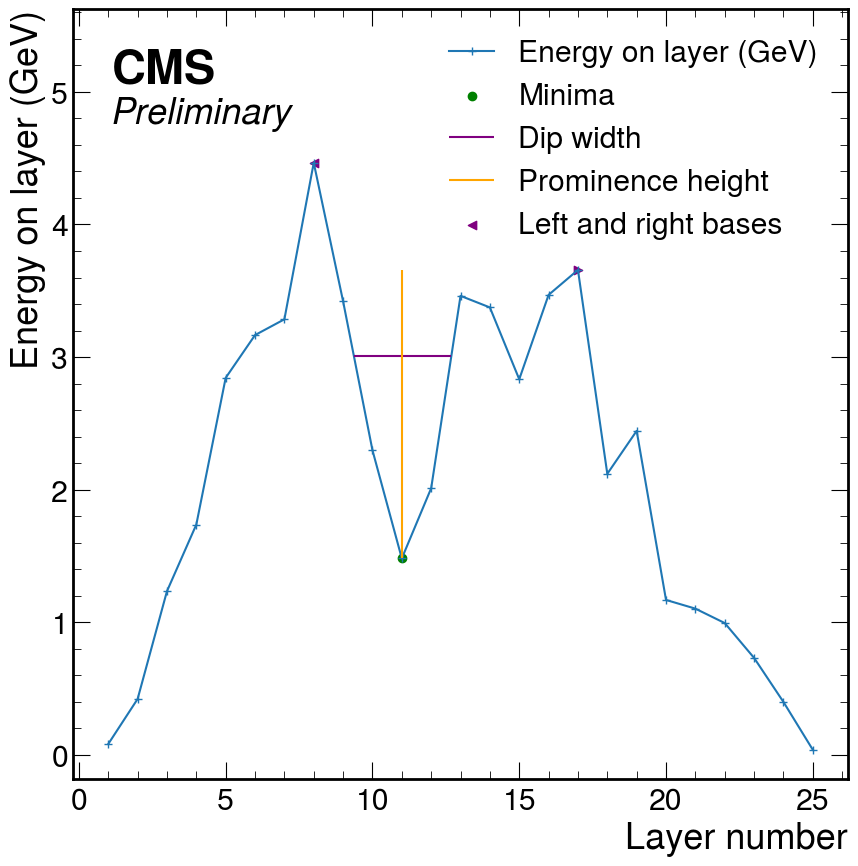

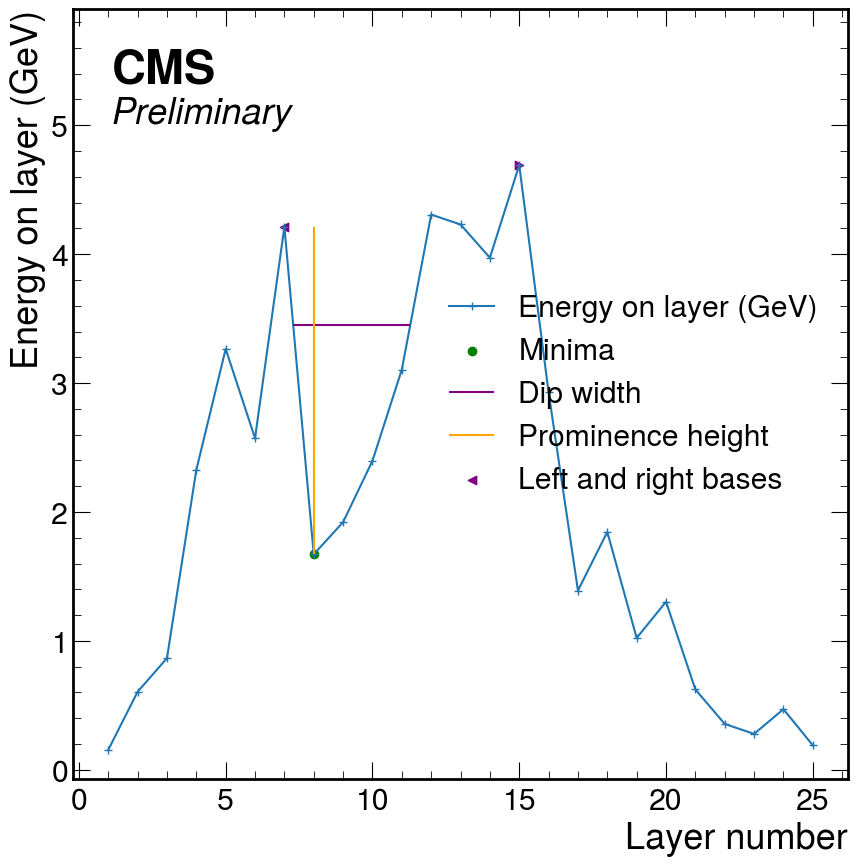

In [ ]:
eventList.plotAllLongitudinalProfiles()